# Coronavirus (COVID-19) Dashboard

In [95]:
from IPython.display import HTML
html1 = '<img src="img1.jpg" width="700" height="700" align="center"/>'
HTML(html1)

In [96]:
from IPython.display import HTML
html1 = '<img src="corona.jpg" width="1100" height="1100" align="center"/>'
HTML(html1)

In [97]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.core.display import display, HTML

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import folium
import plotly.graph_objects as go
import seaborn as sns
import ipywidgets as widgets

In [98]:
# loading data right from the source:
death_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
country_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')

In [99]:
# data cleaning

# renaming the df column names to lowercase
country_df.columns = map(str.lower, country_df.columns)
confirmed_df.columns = map(str.lower, confirmed_df.columns)
death_df.columns = map(str.lower, death_df.columns)
recovered_df.columns = map(str.lower, recovered_df.columns)

# changing province/state to state and country/region to country
confirmed_df = confirmed_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
recovered_df = confirmed_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
death_df = death_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
country_df = country_df.rename(columns={'country_region': 'country'})
# country_df.head()

In [100]:
# total number of confirmed, death and recovered cases
confirmed_total = int(country_df['confirmed'].sum())
deaths_total = int(country_df['deaths'].sum())
recovered_total = int(country_df['recovered'].sum())
active_total = int(country_df['active'].sum())

In [101]:
# displaying the total stats

display(HTML
        ("<div style = 'background-color: #287568; padding: 30px '>" +
    "<span style='color: lightblue; font-size:30px;'> Confirmed: "  + str(confirmed_total) +"</span>" +
    "<span style='color: red; font-size:30px;margin-left:30px;'>    Deaths: " + str(deaths_total) + "</span>"+
    "<span style='color: lightgreen; font-size:30px; margin-left:30px;'>   Recovered: " + str(recovered_total) + "</span>"+
         "</div>")
       )

In [102]:
trid_country_df = country_df[["country","confirmed","deaths","recovered"]] 

# COVID-19 Confirmed/Death/Recovered cases by countries

## Enter the number of countries : 

In [103]:
# sorting the values by confirmed descednding order
# country_df.sort_values('confirmed', ascending= False).head(10).style.background_gradient(cmap='copper')
fig = go.FigureWidget( layout=go.Layout() )
def highlight_col(x):
    r = 'background-color: red'
    lb = 'background-color: lightblue'
    lg = 'background-color: lightgreen'
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    df1.iloc[:, 1] = lb
    df1.iloc[:, 2] = r
    df1.iloc[:, 3] = lg
    
    return df1

def show_latest_cases(n):
    n = int(n)
    return trid_country_df.sort_values('confirmed', ascending= False).head(n).style.apply(highlight_col, axis=None)

interact(show_latest_cases, n='10')

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none' # uncomment this, run cell again - then the graph/figure disappears
widgets.VBox([fig], layout=ipywLayout)

interactive(children=(Text(value='10', description='n'), Output()), _dom_classes=('widget-interact',))

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(border='solid …

In [104]:
sorted_country_df = country_df.sort_values('confirmed', ascending= False)

## Slide to check for the Most affected countries

In [105]:
# # plotting the 20 worst hit countries

def bubble_chart(n):
    fig = px.scatter(sorted_country_df.head(n), x="country", y="confirmed", size="confirmed", color="country",
               hover_name="country", size_max=50)
    fig.update_layout(xaxis_title="Countries",
                      yaxis_title="Confirmed",
                      title={
                        'text': str(n) + " Most affected Countries",
                        'y':0.95,
                        'x':0.5,
                        'xanchor': 'center',
                        'yanchor': 'top'},
                 font=dict(
                        family="Courier New, monospace",
                        size=18,
                        color="#7f7f7f"))
    fig.show();

interact(bubble_chart, n=10)

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none'
widgets.VBox([fig], layout=ipywLayout)

interactive(children=(IntSlider(value=10, description='n', max=30, min=-10), Output()), _dom_classes=('widget-…

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(border='solid …

## World COVID-19 Cases

<ipython-input-106-7666fcf930d8>:15: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



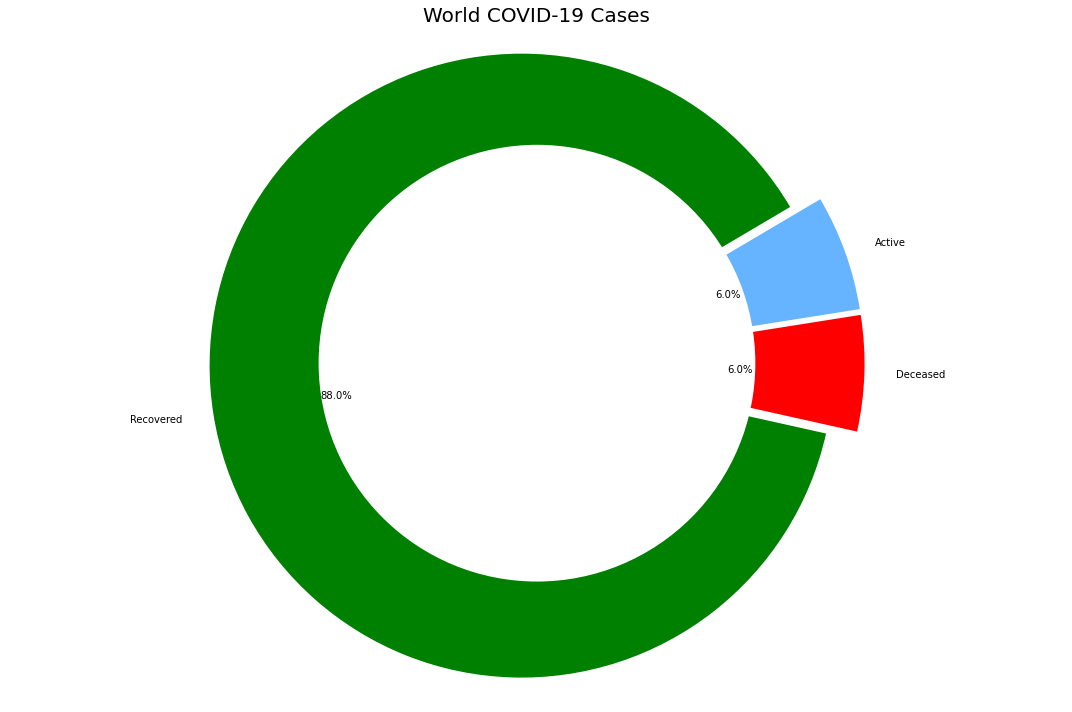

In [106]:
world_confirmed = confirmed_df[confirmed_df.columns[-1:]].sum()
world_recovered = recovered_df[recovered_df.columns[-1:]].sum()
world_deaths = death_df[death_df.columns[-1:]].sum()
world_active = world_confirmed - (world_recovered - world_deaths)

labels = ['Active','Recovered','Deceased']
sizes = [world_active,world_recovered,world_deaths]
color= ['#66b3ff','green','red']
explode = []

for i in labels:
    explode.append(0.05)
    
plt.figure(figsize= (15,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=9, explode =explode,colors = color)
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('World COVID-19 Cases',fontsize = 20)
plt.axis('equal')  
plt.tight_layout()

In [107]:
global_cases = trid_country_df[['country','confirmed','deaths','recovered']]

In [108]:
# Importing the world_coordinates dataset
world_coordinates = pd.read_csv('world_coordinates.csv')

In [109]:
# Merging the coordinates dataframe with original dataframe
world_data = pd.merge(world_coordinates,global_cases,on='country')

## Global spread of COVID-19

In [110]:
# create map and display it
world_map = folium.Map(location=[10, -20], zoom_start=2.3,tiles='Stamen Toner')

for lat, lon, val1, val2, val3, name in zip(world_data['latitude'], world_data['longitude'], world_data['confirmed'], world_data['deaths'],world_data['recovered'],world_data['country']):
    folium.CircleMarker([lat, lon],
                        radius=10,
                        popup = ('<strong>Country</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>Confirmed Cases</strong>: ' + str(val1) + '<br>'
                                '<strong>Deaths</strong>: ' + str(val2) + '<br>'
                                '<strong>Recovered Cases</strong>: ' + str(val3) + '<br>'),
                        color='red',
                        
                        fill_color='red',
                        fill_opacity=0.7 ).add_to(world_map)
world_map

## Preventions:

To prevent infection and to slow transmission of COVID-19, do the following:

* Wash your hands regularly with soap and water, or clean them with alcohol-based hand rub.

* Maintain at least 1 metre distance between you and people coughing or sneezing.

* Avoid touching your face.

* Cover your mouth and nose when coughing or sneezing.

* Stay home if you feel unwell.

* Refrain from smoking and other activities that weaken the lungs.

* Practice physical distancing by avoiding unnecessary travel and staying away from large groups of people

In [111]:
from IPython.display import HTML
html1 = '<img src="1.gif" width="700" height="700" align="center"/>'
HTML(html1)

## Created By: Vidushraj Chandresekeran